In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
#from wordcloud import ImageColorGenerator
#from wordcloud import STOPWORDS
import plotly.graph_objects as go
import pycountry
import ast 
from IPython.display import display_html 
pd.set_option('display.max_colwidth', None)

In [6]:
#load dataset
df = pd.read_csv('titles.csv')

In [7]:
#head dataset
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [8]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

There are a total of 14 columns in the data

# Data Cleaning

In this section data will be cleaned. Steps that will be done are handling missing values, change data type, change column name, etc

In [9]:
#Check the missing value
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

## Analyzing and Dealing Missing Values

In this sub section, missing values from every column will be analyzed to know what caused value missing and solve the problem

In [10]:
# check the missing row for seasons
df[df['seasons'].isnull()].head() 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, but through a series of ridiculous events, he gains a reputation as the Messiah. When he's not dodging his followers or being scolded by his shrill mother, the hapless Brian has to contend with the pompous Pontius Pilate and acronym-obsessed members of a separatist movement. Rife with Monty Python's signature absurdity, the tale finds Brian's life paralleling Biblical lore, albeit with many more laughs.",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800


In [11]:
#asumption : season where missing value exist is row where type is movie
#using if to ensure if the assumption is true
if all(df[df['seasons'].isnull()]['type'] == 'MOVIE'):
    print('The missing seasons is the data with movie type, so the null values will be replaced by 0 (because movie has no seasons)')
    df['seasons'] = df['seasons'].fillna(0)
else : 
    print('The missing season is not always data with movie type. The data with movie type will be replaced by 0 and others will be replaced by 1 (minimum of seasons)')

The missing seasons is the data with movie type, so the null values will be replaced by 0 (because movie has no seasons)


In [12]:
# check the missing row for title
df.query('title.isnull()')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1704,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],0.0,tt4661188,NaN,NaN,NaN,NaN


In [13]:
# Since only few information avaible and the missing data only 1, data with missing title will be removed
df = df.dropna(subset = 'title')

In [14]:
# check the missing row for description
df.query('description.isnull()')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1111,ts271005,幸福料理,SHOW,NaN,2014,TV-14,44,[],[],1.0,NaN,NaN,NaN,0.600,NaN
1114,tm681614,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,"['comedy', 'horror']",[],0.0,tt10033686,2.9,78.0,NaN,NaN
2105,ts82770,Camarón Revolution,SHOW,NaN,2018,TV-14,52,"['documentation', 'reality']",['ES'],1.0,NaN,NaN,NaN,1.290,7.0
2189,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,22,"['scifi', 'action']",['JP'],1.0,NaN,NaN,NaN,0.600,0.5
2485,ts268283,RIDE ON TIME,SHOW,NaN,2018,TV-PG,22,[],['JP'],3.0,NaN,NaN,NaN,1.328,NaN
2754,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,['reality'],[],1.0,tt8908110,NaN,NaN,NaN,NaN
2798,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,['documentation'],['BR'],0.0,tt16114198,6.6,5.0,1.400,5.8
3700,ts312044,Beyblade Burst Surge,SHOW,NaN,2020,TV-Y,23,['animation'],['JP'],1.0,tt18554728,8.3,30.0,7.501,9.7
4110,ts223062,ปริศนาล่าข้ามเวลา,SHOW,NaN,2019,TV-14,60,[],['TH'],1.0,NaN,NaN,NaN,1.473,7.0
4274,tm1172010,The Lockdown Plan,MOVIE,NaN,2020,NaN,49,[],[],0.0,tt13079112,6.5,NaN,NaN,NaN


In [15]:
# Only a few rows with missing description and no enough information on why description is missing. The missing description row will be removed  
df = df.dropna(subset='description')

In [16]:
# Check where age certification is missing
df.query('age_certification.isnull()')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,NaN,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,20.398,7.6
10,tm44204,The Guns of Navarone,MOVIE,"A team of allied saboteurs are assigned an impossible mission: infiltrate an impregnable Nazi-held island and destroy the two enormous long-range field guns that prevent the rescue of 2,000 trapped British soldiers.",1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",0.0,tt0054953,7.5,50748.0,13.844,7.3
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after the war to become one of the hottest acts in show business. In time they befriend and become romantically involved with the beautiful Haynes sisters who comprise a sister act.,1954,NaN,115,"['romance', 'comedy']",['US'],0.0,tt0047673,7.5,42488.0,8.915,7.2
14,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who makes his living selling newspapers in the central Cairo train station, is obsessed by Hanuma, an attractive young woman who sells drinks. While she jokes with him about a possible relationship, she is actually in love with Abu Siri, a strong and respected porter at the station who is struggling to unionize his fellow workers to combat their boss' exploitative and abusive treatment.",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],0.0,tt0051390,7.5,4471.0,5.546,7.3
17,tm14350,Alexandria… Why?,MOVIE,"Set against the panoramic backdrop of war-torn Egypt, director Youssef Chahine tells a highly personal tale of love and determination. Amid the poverty, death and suffering caused by World War II, 18 year-old Yehia, retreats into a private world of fantasy and longing. Obsessed with Hollywood, he dreams of one day studying filmmaking in America, but after falling in love and discovering the lies of European occupation, Yehia profoundly reevaluates his identity and allegiances.",1979,NaN,133,['drama'],['EG'],0.0,tt0077751,7.2,1727.0,1.370,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's success and play bling-themed games, then comic Joel Kim Booster makes his case for joining the cast.",2021,NaN,35,[],['US'],0.0,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between two people regardless of their age gaps.,2021,NaN,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept of romance with episodes involving four sets of people of different age group.,2021,NaN,134,['drama'],[],0.0,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has built his career on sexist humor is forced to assume a woman's identity to elude a relentless drug dealer.,2021,NaN,90,['comedy'],['CO'],0.0,tt14585902,3.8,68.0,26.005,6.3


In [17]:
# There are so many rows with missing age certif. The variable should be removed. But because the variable is important for this research, the varaible won't be removed and the missing row will be replaced with no age certif
df['age_certification'] = df['age_certification'].fillna('No_age_certification')

In [18]:
# imdb id, imdb score, imdb votes, tmdb votes, tmdb popularity
# for these three columns, the missing value caused because the data was not collected well from external web (either imdb or tmdb). Because the row where the data is missing is low, the data where these three missing value will be removed 
df = df.dropna(subset = ['imdb_votes', 'tmdb_popularity', 'imdb_id', 'imdb_score', 'tmdb_score'])

# check the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5129 entries, 1 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5129 non-null   object 
 1   title                 5129 non-null   object 
 2   type                  5129 non-null   object 
 3   description           5129 non-null   object 
 4   release_year          5129 non-null   int64  
 5   age_certification     5129 non-null   object 
 6   runtime               5129 non-null   int64  
 7   genres                5129 non-null   object 
 8   production_countries  5129 non-null   object 
 9   seasons               5129 non-null   float64
 10  imdb_id               5129 non-null   object 
 11  imdb_score            5129 non-null   float64
 12  imdb_votes            5129 non-null   float64
 13  tmdb_popularity       5129 non-null   float64
 14  tmdb_score            5129 non-null   float64
dtypes: float64(5), int64(2), o

Some data type need to be casted

In [19]:
# cast title and description data type into string 
df[['title', 'description']] = df[['title', 'description']].astype('str')

# cast seasons and id data type into integer 
df['seasons'] = df['seasons'].astype('int')

In [52]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,No_age_certification,150,"['war', 'action']","['GB', 'US']",0,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,"A British sketch comedy series with the shows being composed of surreality, risqué or innuendo-laden humour, sight gags and observational sketches without punchlines.",1969,TV-14,30,"['comedy', 'european']",['GB'],4,tt0063929,8.8,73424.0,17.617,8.306


Data has been cleaned. Next step is EDA. Before that, the new data will be saved into directory

In [56]:
#save new file to a csv file
#df.to_csv(r"C:/Personal/DA DS/DS Project/Capstone_project_tetris-main/netlix_data.csv", index=False)

In [57]:
test_written_data = pd.read_csv("C:/Personal/DA DS/DS Project/Capstone_project_tetris-main/netlix_data.csv")
test_written_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],0,tt0075314,8.2,808582.0,40.965,8.179
1,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0,tt0068473,7.7,107673.0,10.010,7.300
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0,tt0071853,8.2,534486.0,15.461,7.811
3,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,No_age_certification,150,"['war', 'action']","['GB', 'US']",0,tt0061578,7.7,72662.0,20.398,7.600
4,ts22164,Monty Python's Flying Circus,SHOW,"A British sketch comedy series with the shows being composed of surreality, risqué or innuendo-laden humour, sight gags and observational sketches without punchlines.",1969,TV-14,30,"['comedy', 'european']",['GB'],4,tt0063929,8.8,73424.0,17.617,8.306


Data has been saved

# Exploratory Data Analysis

In [21]:
# Title
df['title'].value_counts()

title
The Gift                              3
Taxi Driver                           2
Monster                               2
Skylines                              2
The Motive                            2
                                     ..
Insatiable                            1
Better Than Us                        1
Falls Around Her                      1
22 July                               1
Mighty Little Bheem: Kite Festival    1
Name: count, Length: 5088, dtype: int64

Some title appears more than once which means there are more than 1 movie with the same title

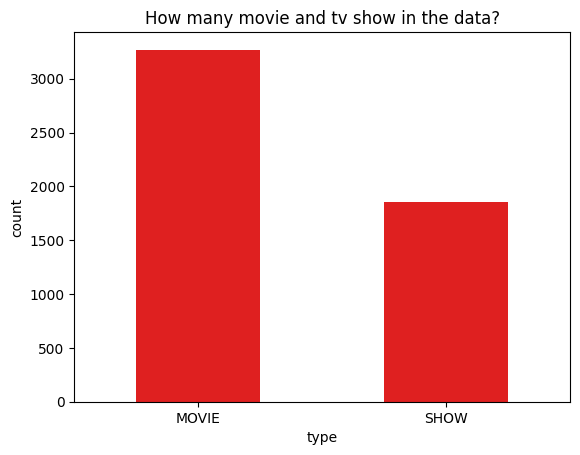

In [22]:
# Type of show
sns.countplot(data=df, x="type", color="red", width=.5).set(title="How many movie and tv show in the data?")
plt.show()

The content of the netflix dominated by movie

Release year

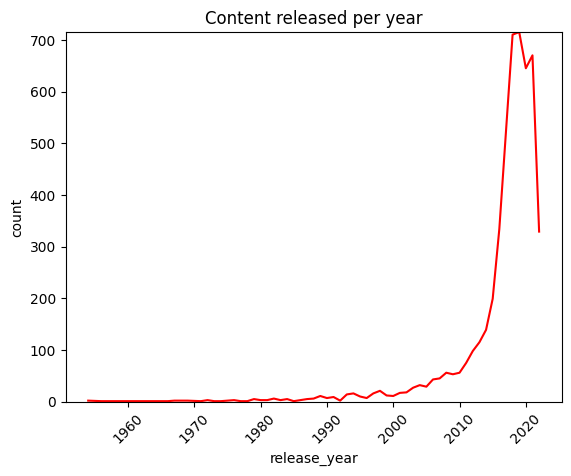

In [23]:
# release year
release_year_df = df["release_year"].value_counts().reset_index()
sns.lineplot(data = release_year_df, x = 'release_year', y='count', color = 'red').set(title="Content released per year")
plt.xticks(rotation=45)
plt.ylim([0, max(release_year_df['count'])])
plt.show()

As we see the total number of content released is linear from 1950s until beginning of 2000 and the growth become exponential and reached the peak in 2020

Age certification

In [24]:
# Age certification
fig = go.Figure(
    go.Pie(
    labels = df['age_certification'].unique(),
    values = df['age_certification'].value_counts(),
    hoverinfo = "label",
    textinfo = "percent"
))
fig.update_layout(
    title={'text': "Percentage of age certification",
            'y':0.9,
            'x':0.5})
fig.show()

Most of the content is rated "R" (Restricted)

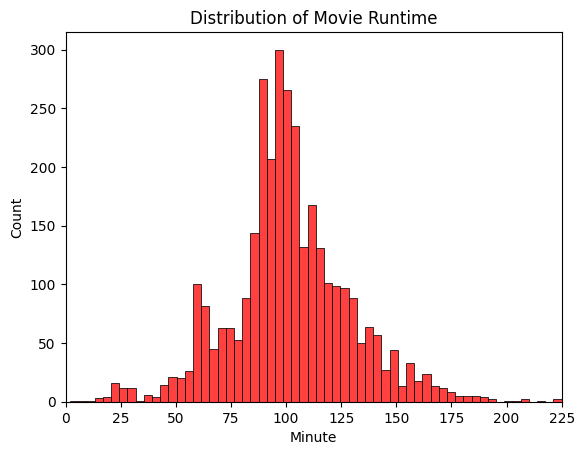

In [25]:
# Runtime 
# movie (in minutes)
sns.histplot(data=df, x=df.query('type == "MOVIE"')['runtime'], color='red')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Minute')
plt.xlim([0, max(df.query('type == "MOVIE"')['runtime'])])
plt.show()

From the histogram, we can see that the minutes in movie vary from 0 to more than 200 with the most quantity around 100. The distribution of movie runtime has a normal like shape

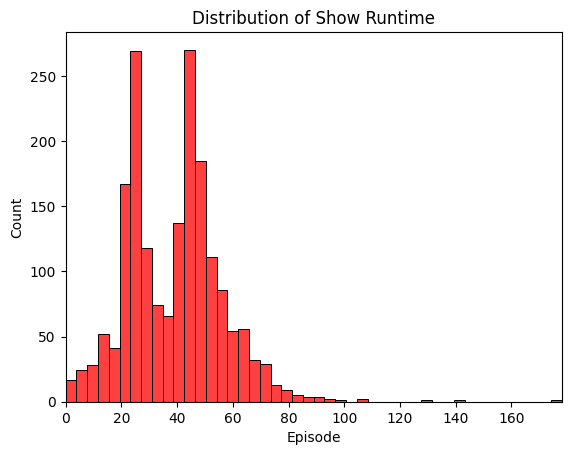

In [26]:
# series
sns.histplot(data=df, x=df.query('type == "SHOW"')['runtime'], color='red')
plt.title('Distribution of Show Runtime')
plt.xlabel('Episode')
plt.xlim([0, max(df.query('type == "SHOW"')['runtime'])])
plt.show()

Most of the show consists of 0-60 episodes (about 1-5 seasons in average). There are two peak point in the histogram which means the distribution of show runtime is multimodal

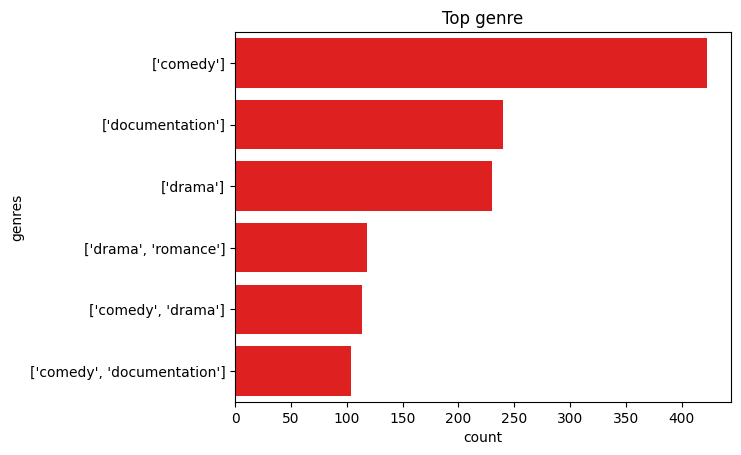

In [27]:
# Genre 
genre_count = df['genres'].value_counts().reset_index()
genre_count

# bar chart 
# so many genre, only genre with 100 count will appear in bar chart
sns.barplot(data=genre_count.query('count >= 100'), y='genres', x='count', color='red').set(title="Top genre")
plt.show()

From the bar chart, the most popular genre is comedy with more than 400 contents. Besides, some genre of the content is combination of more than 1 genre, ex : "drama, romance"

In [28]:
# for single genre only
# function for extract single genre

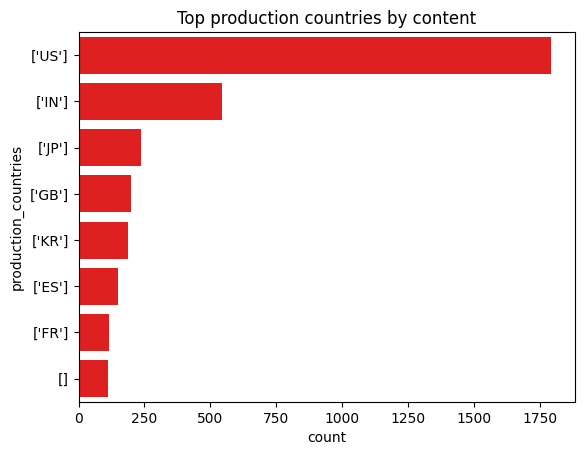

In [29]:
# Production country
prodcountry_count = df['production_countries'].value_counts().reset_index()
prodcountry_count

# bar chart 
# so many production country, only production country  with 100 count will appear in bar chart
sns.barplot(data=prodcountry_count.query('count >= 100'), y='production_countries', x='count', color='red').set(title="Top production countries by content")
plt.show()


There are 7 cpuntries which produce more than 100 contents. One empty array also produce more than 100 contents

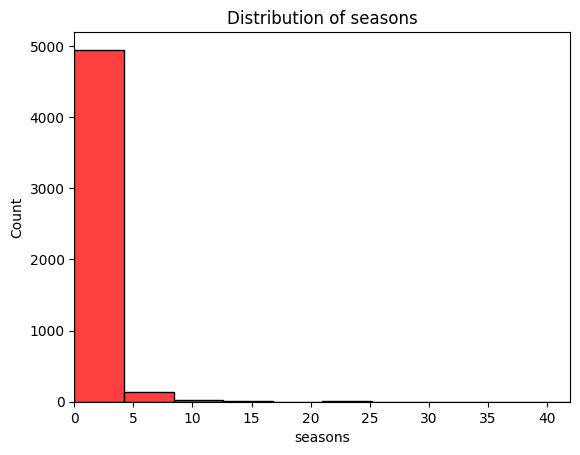

In [30]:
# seasons (only for series) 
sns.histplot(data=df, x='seasons', color='red', bins=10).set(title='Distribution of seasons')
plt.xlim([min(df['seasons']), max(df['seasons'])])
plt.show()

Most of the show consists of 1 to 5 seasons

In [31]:
# imdb and tmdb score
# check min and max of imdb and tmdb score
print(f"Range of Imdb score in data : {[min(df['imdb_score']), max(df['imdb_score'])]}")
print(f"Range of Tmdb score in data : {[min(df['tmdb_score']), max(df['tmdb_score'])]}")

Range of Imdb score in data : [1.6, 9.5]
Range of Tmdb score in data : [1.0, 10.0]


Both of the score is in range of 1 to 10

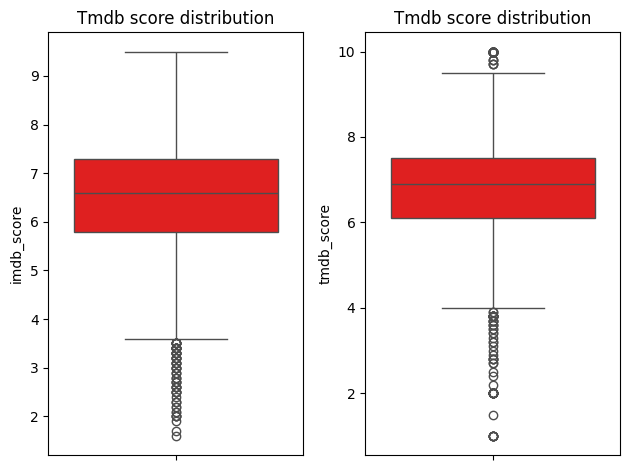

In [32]:
# plotting the distribution
fig, ax = plt.subplots(1, 2)
sns.boxplot(data=df, y='imdb_score', color='red', ax=ax[0]).set(title='Tmdb score distribution')
sns.boxplot(data=df, y='tmdb_score', color='red', ax=ax[1]).set(title='Tmdb score distribution')
plt.tight_layout()
plt.show()

Both imdb and tmdb score distribution have some similarity :
- Centered around 7 
- Many outliers of score under 4 

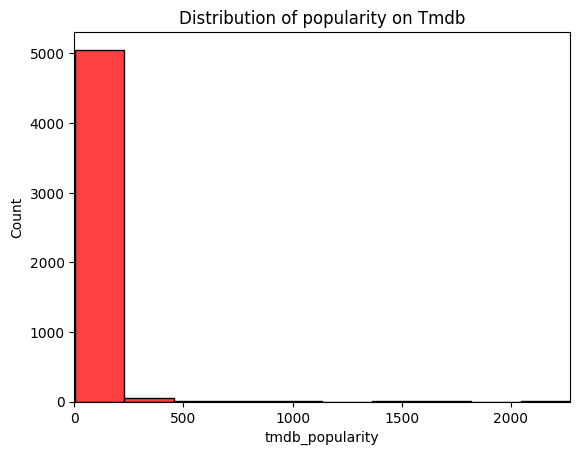

In [33]:
# tmdb popularity 
sns.histplot(data=df, x='tmdb_popularity', color='red', bins=10).set(title='Distribution of popularity on Tmdb')
plt.xlim([0, max(df['tmdb_popularity'])])
plt.show()

The popularity on Tmdb mostly under 500. Some are around 1000, 1500, and over 2000

# EDA for more than one variable

In this section, EDA for more than will be done to find insights from combination of two or more variables

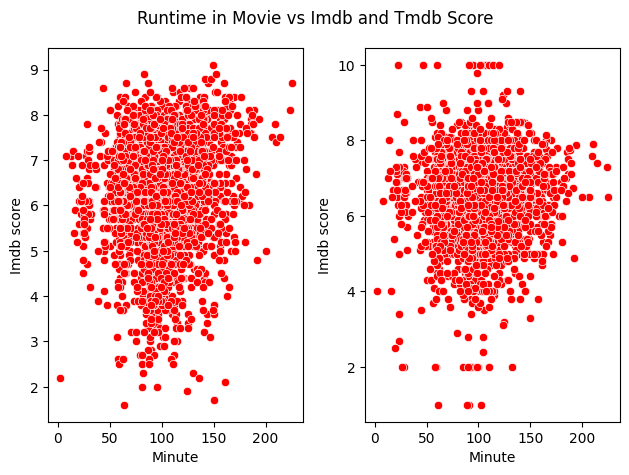

In [34]:
# relationship between runtime in movie and imdb score and compare it with tmdb score
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df.query('type == "MOVIE"'), x='runtime', y='imdb_score', ax=ax[0], color='red')
ax[0].set(xlabel = 'Minute', ylabel='Imdb score')

sns.scatterplot(data=df.query('type == "MOVIE"'), x='runtime', y='tmdb_score', ax=ax[1], color='red')
ax[1].set(xlabel='Minute', ylabel='Imdb score') 
fig.suptitle('Runtime in Movie vs Imdb and Tmdb Score')
plt.tight_layout()
plt.show()

From two scatterplot above we know that there is positive relationship between runtime in movie and imdb, tmdb score

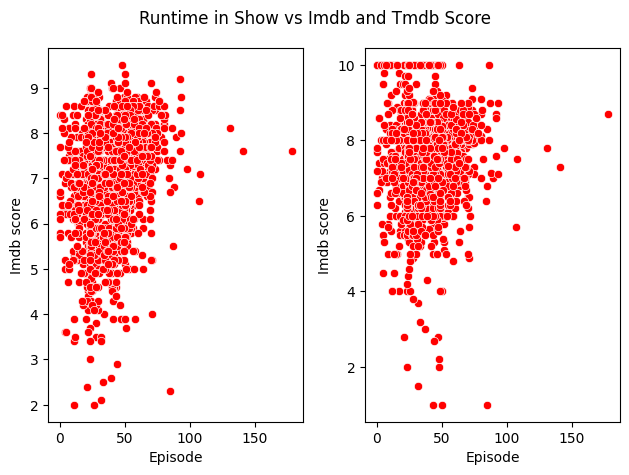

In [35]:
# relationship between runtime in show and imdb score and compare it with tmdb score
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df.query('type == "SHOW"'), x='runtime', y='imdb_score', ax=ax[0], color='red')
ax[0].set(xlabel = 'Episode', ylabel='Imdb score')

sns.scatterplot(data=df.query('type == "SHOW"'), x='runtime', y='tmdb_score', ax=ax[1], color='red')
ax[1].set(xlabel='Episode', ylabel='Imdb score') 
fig.suptitle('Runtime in Show vs Imdb and Tmdb Score')
plt.tight_layout()
plt.show()

From the scatterplots above we know that there is relationship between runtime in show and imdb, tmdb score

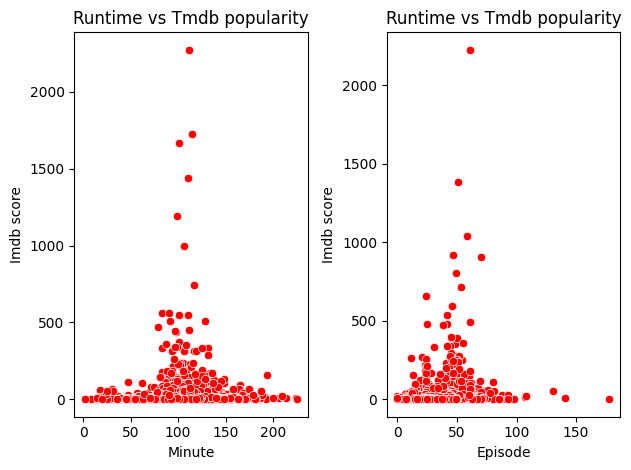

In [36]:
# relationship between runtime and tmdb popularity
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=df.query('type == "MOVIE"'), x='runtime', y='tmdb_popularity', ax=ax[0], color='red')
ax[0].set(xlabel = 'Minute', ylabel='Imdb score', title="Runtime vs Tmdb popularity")

sns.scatterplot(data=df.query('type == "SHOW"'), x='runtime', y='tmdb_popularity', ax=ax[1], color='red')
ax[1].set(xlabel='Episode', ylabel='Imdb score', title="Runtime vs Tmdb popularity") 
plt.tight_layout()
plt.show()

From the plots above we can see that there is very weak relationship between runtime and tmdb popularity either in movie or show

In [37]:
# top title with highest rating (imdb and tmdb)
top10_imdb_titles = df[['title', 'type', 'imdb_score']].sort_values(by='imdb_score', ascending=False).head(10) 
top10_tmdb_titles = df[['title', 'type' , 'tmdb_score']].sort_values(by='tmdb_score', ascending=False).head(10)

imdb_titles10 = top10_imdb_titles.style.set_table_attributes("style='display:inline; margin-right:20px;'")
tmdb_titles10 = top10_tmdb_titles.style.set_table_attributes("style='display:inline'")

display_html(imdb_titles10._repr_html_() + tmdb_titles10._repr_html_(), raw=True)

,title,type,imdb_score
216,Breaking Bad,SHOW,9.500000
233,Avatar: The Last Airbender,SHOW,9.300000
3147,Our Planet,SHOW,9.300000
1258,Reply 1988,SHOW,9.200000
3068,The Last Dance,SHOW,9.100000
1886,My Mister,SHOW,9.100000
4771,Major,MOVIE,9.100000
3500,Kota Factory,SHOW,9.100000
243,DEATH NOTE,SHOW,9.000000
165,Okupas,SHOW,9.000000


The title with highest imdb score and tmdb score are different. The similarity in those two is the type of content that dominating top ten score. Most of the content is show type

In [38]:
# genres with highest average imdb score
top10_imdb_genres = df.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index().head(10) 
top10_tmdb_genres = df.groupby('genres')['tmdb_score'].mean().sort_values(ascending=False).reset_index().head(10)

imdb_genres10 = top10_imdb_genres.style.set_table_attributes("style='display:inline; margin-right:20px;'")
tmdb_genres10 = top10_tmdb_genres.style.set_table_attributes("style='display:inline'")

display_html(imdb_genres10._repr_html_() + tmdb_genres10._repr_html_(), raw=True)

,genres,imdb_score
0,"['scifi', 'animation', 'action', 'family', 'fantasy']",9.300000
1,"['scifi', 'action', 'drama', 'animation', 'fantasy']",9.000000
2,"['action', 'animation', 'comedy', 'fantasy']",9.000000
3,"['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy']",9.000000
4,"['animation', 'thriller', 'scifi', 'drama', 'fantasy', 'crime']",9.000000
5,"['animation', 'action', 'scifi', 'western', 'comedy', 'drama', 'thriller']",8.900000
6,"['animation', 'action', 'comedy', 'drama', 'fantasy']",8.800000
7,"['action', 'drama', 'thriller', 'romance', 'comedy', 'fantasy', 'horror']",8.800000
8,"['animation', 'action', 'drama', 'war', 'history']",8.800000
9,"['drama', 'scifi', 'thriller', 'european']",8.800000


From two tables above we could see that top ten genres with the highest average score in imdb and  tmdb are different. One similar thing in top one highest score both imdb and tmdb is animation genre

In [39]:
#top 10 genres with highest average tmdb popularity
top10_tmdb_genres = df.groupby('genres')['tmdb_popularity'].mean().sort_values(ascending=False).reset_index().head(10)
top10_tmdb_genres

,genres,tmdb_popularity
0,"['scifi', 'thriller', 'drama', 'fantasy', 'horror']",2226.2310
1,"['comedy', 'family', 'fantasy', 'scifi', 'animation']",1723.3630
2,"['comedy', 'horror', 'war', 'fantasy', 'thriller', 'action']",1668.2960
3,"['action', 'thriller', 'drama', 'romance', 'comedy']",1439.9060
4,"['scifi', 'thriller', 'drama', 'action', 'crime']",996.8690
5,"['scifi', 'crime', 'drama', 'fantasy']",922.1120
6,"['drama', 'sport', 'comedy']",746.9280
7,"['scifi', 'thriller', 'action', 'horror']",698.9635
8,"['action', 'animation', 'family', 'fantasy', 'comedy']",656.8320
9,"['action', 'drama', 'scifi', 'horror', 'thriller']",597.2770


The genres with highest average tmdb popularity different with genres with highest imdb & tmdb popularity. The top one is not consist of animation but horror

In [40]:
# production_countries with highest average imdb score
top10_imdb_prodcountries = df.groupby('production_countries')['imdb_score'].mean().sort_values(ascending=False).reset_index().head(10) 
top10_tmdb_prodcountries = df.groupby('production_countries')['tmdb_score'].mean().sort_values(ascending=False).reset_index().head(10)

imdb_prodcountries10 = top10_imdb_prodcountries.style.set_table_attributes("style='display:inline; margin-right:20px;'")
tmdb_prodcountries10 = top10_tmdb_prodcountries.style.set_table_attributes("style='display:inline'")

display_html(imdb_prodcountries10._repr_html_() + tmdb_prodcountries10._repr_html_(), raw=True)

,production_countries,imdb_score
0,"['UA', 'GB', 'US']",8.300000
1,"['CD', 'GB']",8.200000
2,"['CU', 'US']",8.200000
3,"['ZA', 'GB']",8.100000
4,"['US', 'EG', 'GB']",8.100000
5,"['US', 'DE', 'GB']",8.100000
6,"['DE', 'GB', 'US', 'BS', 'CZ']",8.000000
7,"['AT', 'GB', 'US']",8.000000
8,"['US', 'CA', 'FR', 'ES']",8.000000
9,['TZ'],8.000000


The production countries with the highest imdb score and highest tmdb score are different

In [41]:
# to know countries with unfamiliar country code
pycountry.countries.get(alpha_2="KE"), pycountry.countries.get(alpha_2="ZA"),  pycountry.countries.get(alpha_2="UA"),  pycountry.countries.get(alpha_2="EG"),  pycountry.countries.get(alpha_2="TZ")

(Country(alpha_2='KE', alpha_3='KEN', flag='🇰🇪', name='Kenya', numeric='404', official_name='Republic of Kenya'),
 Country(alpha_2='ZA', alpha_3='ZAF', flag='🇿🇦', name='South Africa', numeric='710', official_name='Republic of South Africa'),
 Country(alpha_2='UA', alpha_3='UKR', flag='🇺🇦', name='Ukraine', numeric='804'),
 Country(alpha_2='EG', alpha_3='EGY', flag='🇪🇬', name='Egypt', numeric='818', official_name='Arab Republic of Egypt'),
 Country(alpha_2='TZ', alpha_3='TZA', common_name='Tanzania', flag='🇹🇿', name='Tanzania, United Republic of', numeric='834', official_name='United Republic of Tanzania'))

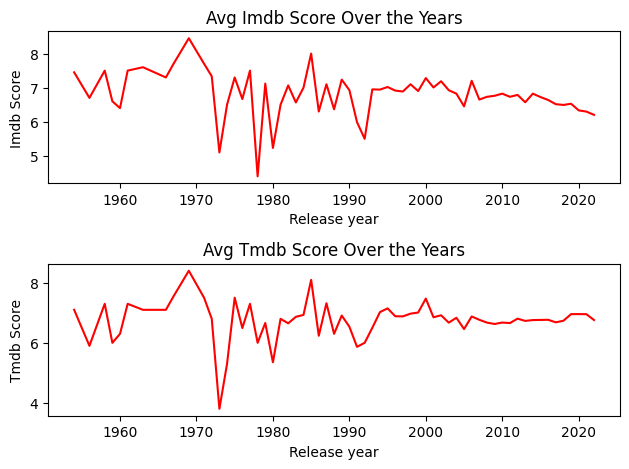

In [42]:
# average imdb and tmdb score over the years 
imdb_year = df.groupby('release_year', as_index=False)['imdb_score'].mean()
tmdb_year = df.groupby('release_year', as_index=False)['tmdb_score'].mean()

fig, ax = plt.subplots(2,1)
sns.lineplot(data=imdb_year, x='release_year', y='imdb_score', color='red', ax=ax[0]).set(title='Avg Imdb Score Over the Years')
ax[0].set(xlabel='Release year', ylabel='Imdb Score') 
sns.lineplot(data=tmdb_year, x='release_year', y='tmdb_score', color='red', ax=ax[1]).set(title='Avg Tmdb Score Over the Years')
ax[1].set(xlabel='Release year', ylabel='Tmdb Score')
plt.tight_layout()
plt.show() 

Both average imdb and tmdb score have similar trend. There is a sharp decline in th beginning of 1970s but in a short time the average rating increase sharply in the middle 1970s.

# Credits Data 

In this section, credits data will be analyzed and combined with title data 

In [43]:
credit_df = pd.read_csv('C:/Personal/DA DS/DS Project/Capstone_project_tetris-main/credits.csv')

In [44]:
# head of data 
credit_df.head(10)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
5,32267,tm84618,Peter Boyle,Wizard,ACTOR
6,519612,tm84618,Leonard Harris,Senator Charles Palantine,ACTOR
7,29068,tm84618,Diahnne Abbott,Concession Girl,ACTOR
8,519613,tm84618,Gino Ardito,Policeman at Rally,ACTOR
9,3308,tm84618,Martin Scorsese,Passenger Watching Silhouette,ACTOR


In [45]:
# info of credits 
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


There are data missing in credit df. The missing data is only in character column. Let's check the percentage of missing data

In [46]:
# percentage missing 
print(f"Percentage of missing data in character column is {credit_df['character'].isnull().sum()/len(credit_df):.2f}")

Percentage of missing data in character column is 0.13


Since the missing data is not many, the row with missing data will be removed

In [47]:
credit_df = credit_df.dropna(subset="character")
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68029 entries, 0 to 77799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  68029 non-null  int64 
 1   id         68029 non-null  object
 2   name       68029 non-null  object
 3   character  68029 non-null  object
 4   role       68029 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


The data has been cleaned. The next step is join the credit and title data on title id from JustWatch

In [48]:
full_df = df.set_index('id').join(credit_df.set_index('id'), on="id", how="inner")
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64549 entries, tm84618 to tm1059008
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 64549 non-null  object 
 1   type                  64549 non-null  object 
 2   description           64549 non-null  object 
 3   release_year          64549 non-null  int64  
 4   age_certification     64549 non-null  object 
 5   runtime               64549 non-null  int64  
 6   genres                64549 non-null  object 
 7   production_countries  64549 non-null  object 
 8   seasons               64549 non-null  int32  
 9   imdb_id               64549 non-null  object 
 10  imdb_score            64549 non-null  float64
 11  imdb_votes            64549 non-null  float64
 12  tmdb_popularity       64549 non-null  float64
 13  tmdb_score            64549 non-null  float64
 14  person_id             64549 non-null  int64  
 15  name          

In [49]:
# save the data into directory

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5129 entries, 1 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5129 non-null   object 
 1   title                 5129 non-null   object 
 2   type                  5129 non-null   object 
 3   description           5129 non-null   object 
 4   release_year          5129 non-null   int64  
 5   age_certification     5129 non-null   object 
 6   runtime               5129 non-null   int64  
 7   genres                5129 non-null   object 
 8   production_countries  5129 non-null   object 
 9   seasons               5129 non-null   int32  
 10  imdb_id               5129 non-null   object 
 11  imdb_score            5129 non-null   float64
 12  imdb_votes            5129 non-null   float64
 13  tmdb_popularity       5129 non-null   float64
 14  tmdb_score            5129 non-null   float64
dtypes: float64(4), int32(1), i

In [51]:
#save new file to a csv file
credit_df.to_csv('full_data.csv')